In [23]:
# penggunaan linear regression
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

#normalisasi data: minmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#ambil data
df = pd.read_csv('stock.csv')
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date'] 
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


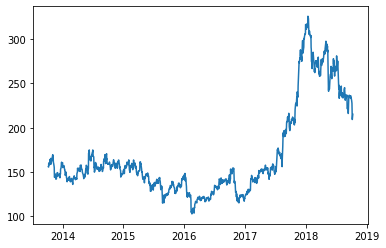

In [24]:
plt.plot(df['Close'], label = 'Historical Stock Price')


In [25]:
data = df.sort_index(ascending=True, axis=0 )
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date','Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
 
new_data

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [27]:
train = new_data[:987]
valid = new_data[987:]

train.shape


(987, 2)

In [28]:
valid.shape[0]

248

In [33]:
preds = []
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)
    
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
rms

104.51415465984348

In [35]:
valid

,Date,Close,Predictions,Prediction
987,2017-10-09 00:00:00,208.3,152.306452,152.306452
988,2017-10-10 00:00:00,208.45,152.310711,152.310711
989,2017-10-11 00:00:00,209.4,152.313376,152.313376
990,2017-10-12 00:00:00,212,152.331373,152.331373
991,2017-10-13 00:00:00,210.25,152.327871,152.327871
...,...,...,...,...
1230,2018-10-01 00:00:00,230.9,163.132287,163.132287
1231,2018-10-03 00:00:00,227.6,162.960239,162.960239
1232,2018-10-04 00:00:00,218.2,162.784877,162.784877
1233,2018-10-05 00:00:00,209.2,162.614857,162.614857


c:\users\student\pycharmprojects\venv\cams_ml_37433\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\student\pycharmprojects\venv\cams_ml_37433\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


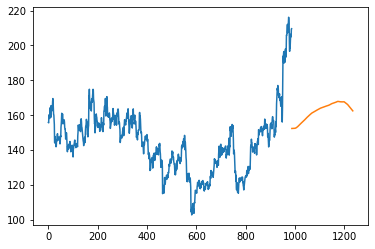

In [39]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid['Predictions'])